In [18]:
import matplotlib as mpl
from cycler import cycler
from matplotlib import ticker

mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['lines.markersize'] = 8

mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['xtick.color'] = '#A9A9A9'
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['ytick.color'] = '#A9A9A9'

mpl.rcParams['grid.color'] = '#ffffff'
mpl.rcParams['axes.facecolor'] = '#ffffff'

mpl.rcParams['axes.spines.left'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = False

mpl.rcParams['axes.prop_cycle'] = cycler(color=['#2EBCE7', '#84EE29', '#FF8177'])

$$
\newcommand\norm[1]{\lVert#1\rVert}
\def\va{{\boldsymbol{a}}} % Vectors
\def\vb{{\boldsymbol{b}}}
\def\vi{{\boldsymbol{i}}}
\def\vj{{\boldsymbol{j}}}
\def\vp{{\boldsymbol{p}}}
\def\vq{{\boldsymbol{q}}}
\def\vu{{\boldsymbol{u}}}
\def\vv{{\boldsymbol{v}}}
\def\vw{{\boldsymbol{w}}}
\def\vx{{\boldsymbol{x}}}
\def\vy{{\boldsymbol{y}}}
\def\vz{{\boldsymbol{z}}}
\def\mA{{\boldsymbol{A}}} % Matrices
\def\mB{{\boldsymbol{B}}}
\def\mC{{\boldsymbol{C}}}
\def\mD{{\boldsymbol{D}}}
\def\mI{{\boldsymbol{I}}}
\def\mQ{{\boldsymbol{Q}}}
\def\mS{{\boldsymbol{S}}}
\def\mT{{\boldsymbol{T}}}
\def\mU{{\boldsymbol{U}}}
\def\mV{{\boldsymbol{V}}}
\def\mW{{\boldsymbol{W}}}
\def\mX{{\boldsymbol{X}}}
$$

# 1. Scalars, Vectors, matrices and tensors

In linear algebra, you deal with vectors. Mathematical objects like *scalars* are defined according to their relationship to vectors: they are numbers that *scale* vectors.

## 1.1 Geometric and coordinate vectors

- Geometric vectors vs. coordinate vectors

<img src="images/coordinate_vector.png" width="200">
Example of a vector $\vv$.

The coordinate vector $\vv$ represented in the figure is defined as:

$$
\vv = \begin{bmatrix}
3 \\\\
2
\end{bmatrix}
$$


You can use Numpy to create vectors:

In [120]:
import numpy as np
v = np.array([3, 2])
v

array([3, 2])

You can represent these vectors as points in space (scatter plot) instead of arrows:

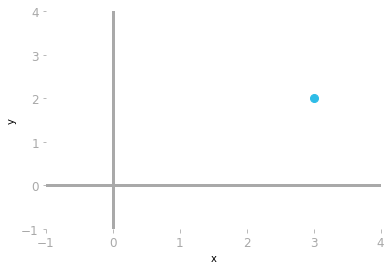

In [19]:
import matplotlib.pyplot as plt
plt.scatter(v[0], v[1])


#### Plot axes, labels, etc.
plt.xlabel("x")
plt.ylabel("y")
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
plt.axhline(0, c='#a9a9a9', zorder=1)
plt.axvline(0, c='#a9a9a9', zorder=1)
plt.xlim(-1, 4)
plt.ylim(-1, 4)
plt.show()

- **Indexing**: you can retrieve values in a vector specifying its index (its position in the vector). Note that Python uses zero-based indexing: the first value is at index 0. So, you can get the first value of $\vv$ with `v[0]` and the second one with `v[1]`.


- **More dimensions**: you can create vectors with more values, it will just be harder to represent.


- Representing **data** as vectors.

Let's say that data corresponding to grades at two exams. You can create one vector per student: each vector contains two values for the two grades. However, to plot the data it can be more convenient to create one vector for each grade containing each all students grades. You'll have two vectors. For instance:

In [42]:
x = np.array([1, 2, 3])
y = np.array([-1, 4, 6])

Then, you can plot the data:

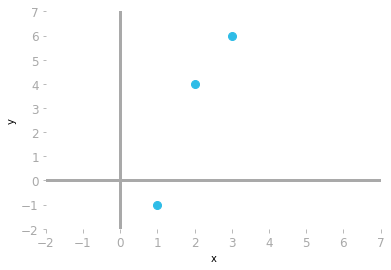

In [46]:
plt.scatter(x, y)

#### Plot axes, labels, etc.
plt.xlabel("x")
plt.ylabel("y")
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
plt.axhline(0, c='#a9a9a9', zorder=1)
plt.axvline(0, c='#a9a9a9', zorder=1)
plt.xlim(-2, 7)
plt.ylim(-2, 7)
plt.show()

#### Exercise

Consider the following dataset:


In [49]:
import pandas as pd
df = pd.DataFrame({"age": [23, 25, 54, 41, 32], "experience (years)": [1, 2, 26, 17, 6]})
df

,age,experience (years)
0,23,1
1,25,2
2,54,26
3,41,17
4,32,6


Create Numpy vectors from the columns of the dataset and create a scatter plot (experience as a function of age) with Matplotlib.





<details>
  <summary>Click to see a solution!</summary>
  <pre>
    age = df["age"].to_numpy()
    experience = df["experience (years)"].to_numpy()
    plt.scatter(age, experience)
    plt.xlabel("Age")
    plt.ylabel("Experience")

    #### Plot axes, labels, etc.
    plt.xlabel("x")
    plt.ylabel("y")
    ax = plt.gca()
    ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
    plt.axhline(0, c='#a9a9a9', zorder=1)
    plt.axvline(0, c='#a9a9a9', zorder=1)
    plt.show()
  </pre>
</details>

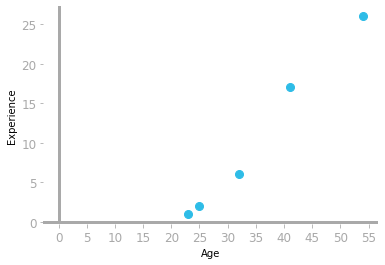

In [123]:
age = df["age"].to_numpy()
experience = df["experience (years)"].to_numpy()
plt.scatter(age, experience)
plt.xlabel("Age")
plt.ylabel("Experience")

#### Plot axes, labels, etc.
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
plt.axhline(0, c='#a9a9a9', zorder=1)
plt.axvline(0, c='#a9a9a9', zorder=1)
plt.show()

## 1.2 Matrices and Tensors

As vectors, in data science, you can consider *matrices* as a way to store data: they are arrays of numbers organized as row and columns. Let's take an example:

$$
\mA = 
\begin{bmatrix}
1 & 0 \\\\
2 & 3
\end{bmatrix}
$$

- Any number of rows and columns


- In Numpy, matrices are called *two-dimensional arrays*. Let's create one:

In [125]:
A = np.array([[2.1, 7.9, 8.4],
              [3.0, 4.5, 2.3],
              [12.2, 6.6, 8.9],
              [1.8, 1., 8.2]])

In [126]:
A

array([[ 2.1,  7.9,  8.4],
       [ 3. ,  4.5,  2.3],
       [12.2,  6.6,  8.9],
       [ 1.8,  1. ,  8.2]])

- Note the two pairs of square brackets (`[[]]`).

### Shape

- It is important to check the shape of the arrays you manipulate.


- By convention, the first number corresponds to the rows and the second number to the columns.


In [127]:
A.shape

(4, 3)

### Indexing

As with vectors, you can get components of the matrix using indexing.


- You'll need to indexes (one for the row index, and one for the column index):

In [23]:
A[1, 2]

2.3

`A[1, 2]` returns the component with the row index one and the column index two (with a zero-based indexing).

- Colon means from the first to the last index:

In [24]:
A[:, 0]

array([ 2.1,  3. , 12.2,  1.8])

In [25]:
A[1, :]

array([3. , 4.5, 2.3])

- Use lists (or other Numpy arrays):

In [26]:
A[[0, 2], 1]

array([7.9, 6.6])

In [128]:
A[:2, 0]

array([2.1, 3. ])

### Tensors

You can create data structures with more than two directions: in the context of data science, this is called tensors. *Tensors* are multi-dimensional arrays. Scalars, vectors, and matrices are also tensors with specific *rank* (the number of dimensions):

<img src="images/scalars_to_tensors.png" width="400">
Scalars, vectors, matrices and tensors.

- Example 1: store color images:

<img src="images/tensor_image.png" width="150">
Illustration of the pixels of an image.

You can store these pixel values in a three-dimensional Numpy array, that is, a *rank-3* tensor.

- Example 2: rank-4 tensor with batch of images. Load the CIFAR dataset using keras, here is what you get:

In [61]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()


In [62]:
X_train.shape

(50000, 32, 32, 3)

## 1.3 Exercises

1. Create a matrix of shape (4, 3) and check its shape. You can fill it with any numbers.

<details>
  <summary>Click to see a solution!</summary>
  <pre>
      B = np.zeros((4, 3))
      B.shape
  </pre>
</details>

2. Take the following matrix:

In [37]:
np.random.seed(123)
B = np.random.randint(0, 100, (3, 3))
B

array([[66, 92, 98],
       [17, 83, 57],
       [86, 97, 96]])

Index the matrix $B$ to get the following values:

- the last column

<details>
  <summary>Click to see a solution!</summary>
    <pre>
B[:, -1]
    </pre>
</details>

- the first two rows

<details>
  <summary>Click to see a solution!</summary>
    <pre>
B[:2, :]
    </pre>
</details>

- 17 and 57

<details>
  <summary>Click to see a solution!</summary>
    <pre>
B[1, [0, 2]]
    </pre>
</details>

## 2. Operations on Vectors and Matrices

In this part, you'll see how to operate on vectors and matrices.


### 2.1 Scalar Multiplication

Scalar multiplication is the multiplication of a vector by a scalar: you get a new vector that is a scaled version of the initial one.

- Example: $\vv$ multiplied by the scalar -2:

$$
\vv = \begin{bmatrix}
3 \\\\
2
\end{bmatrix}
$$


$$
\vw = -2\vv = -2 \begin{bmatrix}
3 \\\\
2
\end{bmatrix} = 
\begin{bmatrix}
-2 \cdot 3 \\\\
-2 \cdot 2
\end{bmatrix} =
\begin{bmatrix}
-6 \\\\
-4
\end{bmatrix}
$$

- Let's do this operation with Numpy and plot the initial vector $\vv$ and the resulting vector $\vw$:

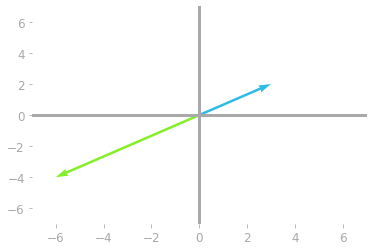

In [79]:
v = np.array([3, 2])
w = -2 * v

plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='#2EBCE7')
plt.quiver(0, 0, w[0], w[1], angles='xy', scale_units='xy', scale=1, color='#84EE29')

#### Plot axes, labels, etc.
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.yaxis.set_major_locator(ticker.MultipleLocator(2))
plt.axhline(0, c='#a9a9a9', zorder=1)
plt.axvline(0, c='#a9a9a9', zorder=1)
plt.xlim(-7, 7)
plt.ylim(-7, 7)
plt.show()

- The initial vector (in blue) and the scaled vectors (in green) are both are on the same line.


#### Matrices

$$
c \cdot
\begin{bmatrix}
A_{1,1} & A_{1,2} \\\\
A_{2,1} & A_{2,2} \\\\
A_{3,1} & A_{3,2}
\end{bmatrix}
= \begin{bmatrix} 
c \cdot A_{1,1} & c \cdot A_{1,2} \\\\
c \cdot A_{2,1} & c \cdot A_{2,2} \\\\
c \cdot A_{3,1} & c \cdot A_{3,2}
\end{bmatrix}
$$


### 2.2 Addition

Addition of vectors results in another vector.

- For instance, let's add the two vectors:

$$
\vu = \begin{bmatrix}
1 \\\\
2
\end{bmatrix}
$$

and 

$$
\vv = \begin{bmatrix}
5 \\\\
2
\end{bmatrix}
$$

$$
\vw = \vu + \vv = 
\begin{bmatrix}
1 \\\\
2
\end{bmatrix} + \begin{bmatrix}
5 \\\\
2
\end{bmatrix} =
\begin{bmatrix}
1 + 5 \\\\
2 + 2
\end{bmatrix} = 
\begin{bmatrix}
6 \\\\
4
\end{bmatrix}
$$

- Add each component with the same index


- Now with Numpy:

In [100]:
u = np.array([1, 2])
v = np.array([5, 2])

w = u + v
w

array([6, 4])

- Plot of the vectors:

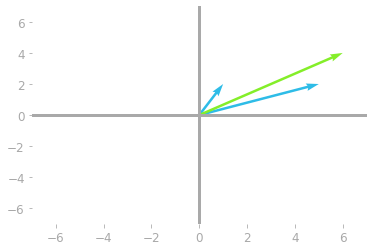

In [83]:
plt.quiver(0, 0, u[0], u[1], angles='xy', scale_units='xy', scale=1, color='#2EBCE7')
plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='#2EBCE7')
plt.quiver(0, 0, w[0], w[1], angles='xy', scale_units='xy', scale=1, color='#84EE29')

#### Plot axes, labels, etc.
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.yaxis.set_major_locator(ticker.MultipleLocator(2))
plt.axhline(0, c='#a9a9a9', zorder=1)
plt.axvline(0, c='#a9a9a9', zorder=1)
plt.xlim(-7, 7)
plt.ylim(-7, 7)
plt.show()

#### Matrices

<img src="images/matrix_addition.png" width="400">
Addition of two matrices.

#### Broadcasting

In [135]:
A = np.array([[2, 7],
              [3, 4],
              [8, 2]])

In [136]:
A.shape

(3, 2)

In [137]:
B = np.array([[7],
              [1],
              [3]])

In [138]:
B.shape

(3, 1)

In [139]:
A + B

array([[ 9, 14],
       [ 4,  5],
       [11,  5]])

In [140]:
(A + B).shape

(3, 2)

### 2.3 Transposition

#### Vectors

You can distinguish *row vectors* from *column vectors*. Transposition converts rows vectors into column vectors and column vectors into rows vectors.

$$
\begin{bmatrix}
2 \\\\
5
\end{bmatrix}^\text{T}
=
\begin{bmatrix}
2 & 5
\end{bmatrix}
$$

- Note: With Numpy, one-dimensional array can't be transpose:


In [85]:
v = np.array([2, 5])
v

array([2, 5])

In [86]:
v.T

array([2, 5])

#### Matrices


<img src="images/matrix_transposition.png" width="400">
Matrix transposition

In [101]:
A = np.array([[2.1, 7.9, 8.4],
              [3.0, 4.5, 2.1],
              [12.2, 6.6, 8.9],
              [1.8, 1.3, 8.2]])
A.T

array([[ 2.1,  3. , 12.2,  1.8],
       [ 7.9,  4.5,  6.6,  1.3],
       [ 8.4,  2.1,  8.9,  8.2]])

### 2.4 Exercises

Implement vector operations from mathematical notation.

You'll use the following vectors and matrices:

In [84]:
u = np.array([3, 1])
v = np.array([4, -2])
w = np.array([-5, 3])

A = np.array([[7.2, 4.8, 9.1, 2.5, 1.4],
              [1.2, 0.3, 1, 5.4, 3.3]])
B = np.array([[1.1, 3.4],
              [4.5, 4.3]])

- $2 \vu + 3 \vv - \vw$

<details>
  <summary>Click to see a solution!</summary>
    <pre>
2 * u + 3 * v - w
    </pre>
</details>

- $(BA)^{\text{T}}$

<details>
  <summary>Click to see a solution!</summary>
    <pre>
(B @ A).T
    </pre>
</details>

## 3. Norms

In machine learning, it is crucial to compare vectors, like for instance to evaluate the error of a model (you compare a vector of estimated values with a vector of true values).

- Norms associate a single number to a vector.


- The norm of a vector $u$ is denoted as $\norm{\vu}$.


- Distance between two vectors.


- There are different ways to calculate distances, so there are different norms. More generally, a mathematical entity can be called a norm only if:

1. Non-Negativity.
2. Zero-Vector Norm.
3. Scalar Multiplication: $\norm{k \cdot \vu} = \left| k \right| \cdot \norm{\vu}$.
4. Triangle Inequality: $\norm{\vu + \vv} \leq \norm{\vu} + \norm{\vv}$.

<img src="images/triangle_inequality.png" width="300">
Illustration of the triangle inequality.

### 3.1 $L^1$

- Lasso regression when $L^1$ is used as regularization.
- The equivalent loss function is Mean Absolute Error (MAE).

$$
\norm{\vu}_1 = \sum_{i=1}^m \left| u_i \right|
$$

with $\vu$ the vector, $m$ its number of components, and $i$ the index of current component.

- With Numpy:

In [141]:
u = np.array([2, 1])
np.linalg.norm(u, ord=1)

3.0

### 3.2 $L^2$

- Ridge regression when $L^2$ is used as regularization.
- The equivalent loss function is the Mean Squared Error (MSE).
- Corresponds to physical distance.

$$
\norm{\vu}_2  = \sqrt{\sum_{i=1}^m u_i^2}
$$

with $\vu$ the vector, $m$ its number of components, and $i$ the index of current component.

- With Numpy:

In [87]:
u = np.array([2, 1])
np.linalg.norm(u, ord=2)

2.23606797749979

### 3.3 Squared $L^2$

$$
\norm{\vu}_2^2 = \sum_{i=1}^m u_i^2
$$

with $\vu$ the vector, $m$ its number of components, and $i$ the index of current component.

- Advantageous for computation reasons.


- Possible to calculate using the dot product of a vector with itself:


In [107]:
np.linalg.norm(u, ord=2) ** 2

5.000000000000001

In [108]:
u @ u

5

### 3.3 Exercise

Let's say you have some data corresponding to the prices of apartments. You built two models to predict the price from various features. The vector `y` contains the true prices of the apartment. The vector `y_hat_first_model` contains the estimated prices obtained from the first model and `y_hat_second_model` the estimated prices from the second model.

In [93]:
y = np.array([110, 1200, 650, 300, 420])
y_hat_first_model = np.array([90, 1000, 620, 330, 340])
y_hat_second_model = np.array([100, 1260, 600, 320, 440])


Which model is better?

Use the $L^2$ norm to calculate the distance between the true and the estimated prices for the two models.


<details>
  <summary>Click to see a solution!</summary>
    <pre>
error_first_model = y - y_hat_first_model
error_second_model = y - y_hat_second_model
np.linalg.norm(error_first_model, ord=2)
np.linalg.norm(error_second_model, ord=2)
    </pre>
    You can deduce that the second model is better than the first because the error, calculated as the distance between the true prices and the estimated prices, is lower.
</details>

In [143]:
error_first_model = y - y_hat_first_model
error_second_model = y - y_hat_second_model

np.linalg.norm(error_first_model, ord=2)


220.45407685048602

In [144]:
np.linalg.norm(error_second_model, ord=2)

83.66600265340756

## 4. The Dot Product

The *dot product* is an operation that takes two vectors and returns a scalar. It is an example of a more general operation named the *inner product*.

<img src="images/dot_product_vectors.png" width="300">
Illustration of the dot product.

- It is the sum of products of the components with the same index

$$
\vu \cdot \vv = \sum_{i=1}^m  u_i v_i
$$

- With Numpy, you can use the following syntax to calculate the dot product of vectors:

In [152]:
u = np.array([1, 2, 3])
v = np.array([4, 5, 6])
u.dot(v)

32

Or with Python 3.5+:

In [153]:
u @ v

32

#### Calculating the Squared $L^2$ Norm

- The dot product of a vector with itself gives you the $L^2$ norm:

$$
\vu \cdot \vu =
\begin{bmatrix}
u_1 \\\\
u_2 \\\\
u_3
\end{bmatrix} \cdot
\begin{bmatrix}
u_1 \\\\
u_2 \\\\
u_3
\end{bmatrix} =
u_1^2 + u_2^2 + u_3^2 = \sum_{i=1}^m u_i^2
$$


#### What is this value?

<img src="images/dot_product_vectors_geo.png" width="300">

- The dot product corresponds to the length of $\vv$ multiplied by the length of the projection (the vector $\vu_{\text{proj}}$).


### 4.2 Matrix-Vector Product


Product of a matrix with a vector:

<img src="images/matrix_vector_dot_product.png" width="350">
Steps of product between a matrix and a vector.

- Take one row, consider it as a vector and do the dot product with the column vector.

In [145]:
A = np.array([
    [1, 2],
    [5, 6],
    [7, 8]
])
v = np.array([3, 4])

In [146]:
A @ v

array([11, 39, 53])

- Weighting of the matrix columns with the elements of the vector (I recommend: Strang, G. "Introduction to linear algebra, 5th edn. Wellesley." (2016).):

<img src="images/matrix_vector_dot_product_weights.png" width="400">
The vectors values are weighting the columns of the matrix.


### 4.3 Matrix-Matrix Product

You can use the same idea to calculate the product of two matrices (if their shapes are allowing it). For instance:

<img src="images/matrix_matrix_dot_product.png" width="500">
Matrix product.


In [99]:
A = np.array([
    [1, 2],
    [5, 6],
    [7, 8],
])
B = np.array([
    [3, 9],
    [4, 0]
])

A @ B

array([[11,  9],
       [39, 45],
       [53, 63]])


<img src="images/matrix_matrix_dot_product_shapes.png" width="300">


- Shapes must match for the dot product between two matrices.


#### Transpose of a Matrix Product

The transpose of the dot product between two matrices is equals to:

$$
(\mA \mB)^{\text{T}} = \mB^{\text{T}} \mA^{\text{T}}
$$


### 4.3 Exercises

Take the following vectors and matrices:

In [148]:
A = np.array([
    [1, 2, 3],
    [4, 5, 6]
])
B = np.array([
    [3, 9],
    [4, 0]
])
C = np.array([
    [7, 2],
    [9, 3],
    [2, 1]
])

u = np.array([1, 2, 3])
v = np.array([4, 2])

1. Calculate $(\mB \mA)^{\text{T}}$ and check that it equals $\mA^{\text{T}} \mB^{\text{T}}$

<details>
  <summary>Click to see a solution!</summary>
    <pre>
(B @ A).T
A.T @ B.T
    </pre>
</details>

In [154]:
(B @ A).T

array([[39,  4],
       [51,  8],
       [63, 12]])

In [155]:
A.T @ B.T

array([[39,  4],
       [51,  8],
       [63, 12]])

2. Check that the shapes match for the following transformations (answer 0 or 1).

- $Au$
- $BA$
- $AB$
- $uv$
- $Cv$

<details>
  <summary>Click to see a solution!</summary>
    - $Au$: 1
    - $BA$: 1
    - $AB$: 0
    - $uv$: 0
    - $Cv$: 1
</details>